In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

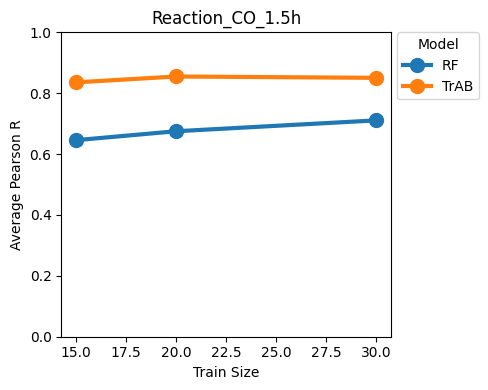

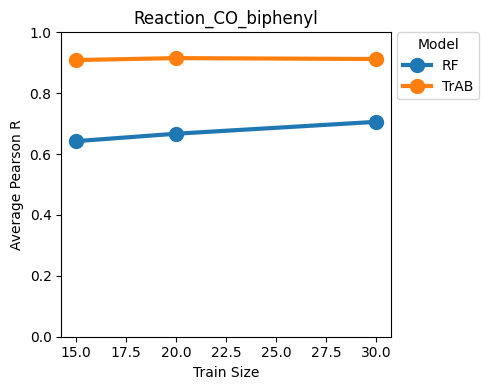

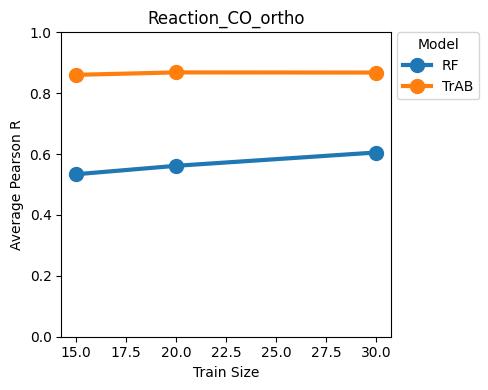

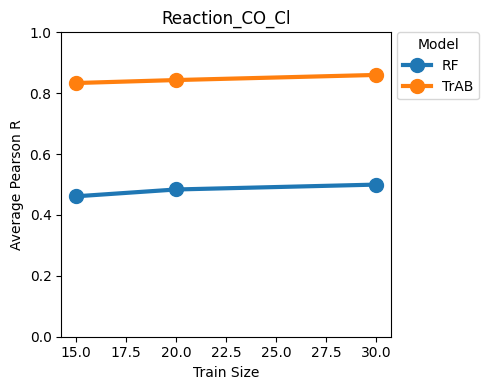

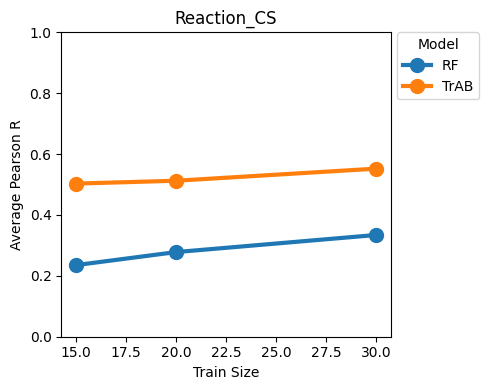

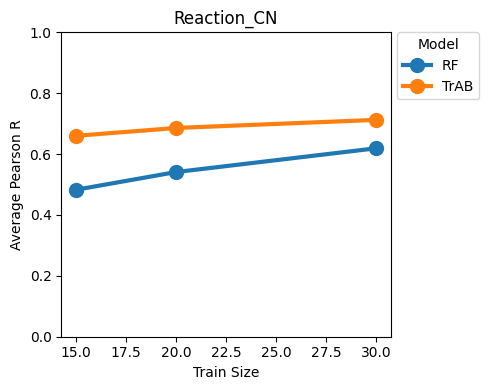

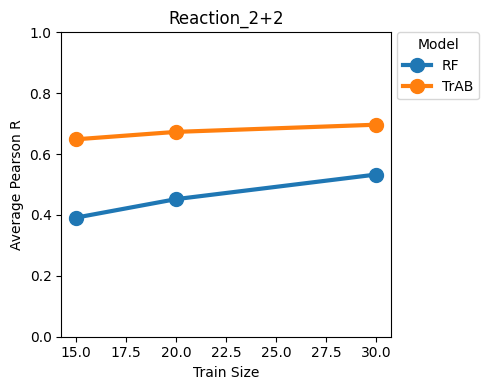

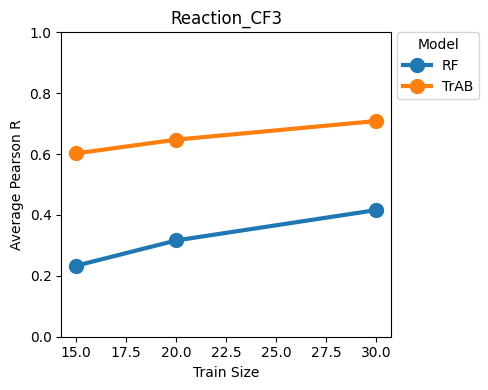

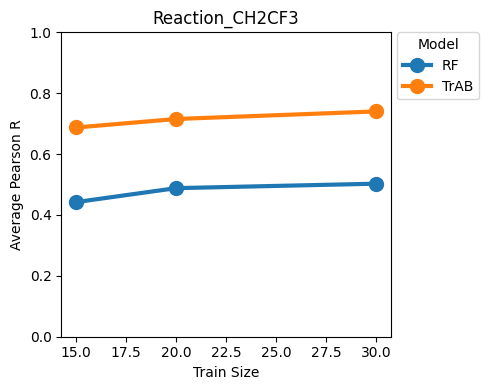

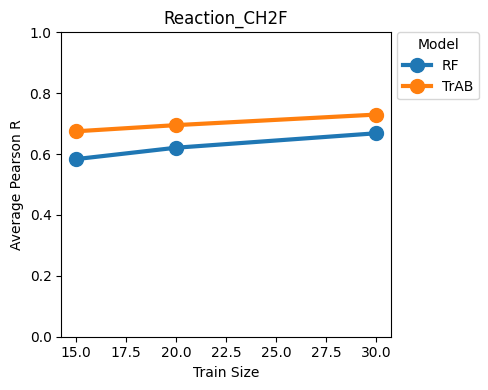

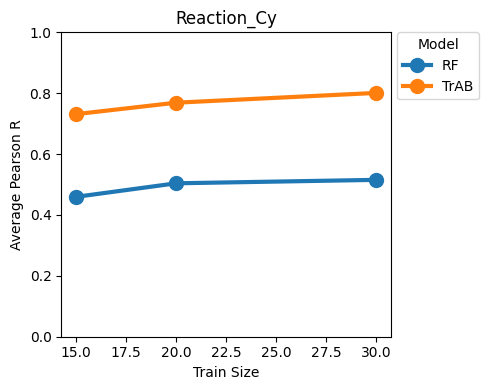

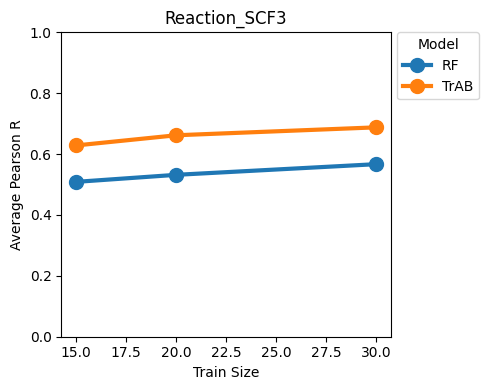

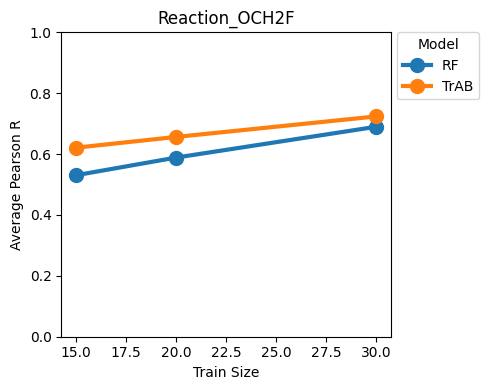

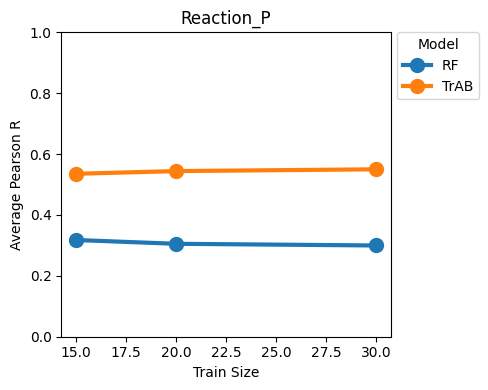

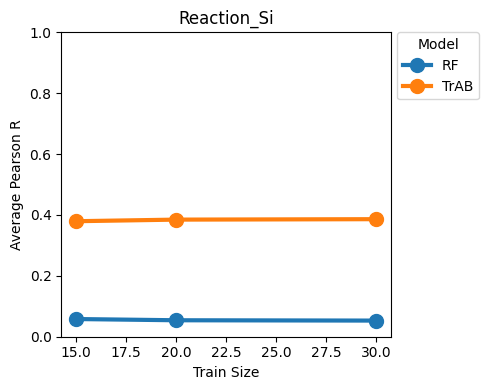

In [2]:
df_rf = pd.read_csv("results/summary_reg/summary_RF_trainsize_results.csv")
df_trab = pd.read_csv("results/summary_reg/summary_TrAB_trainsize_results.csv")

df_rf["model"] = "RF"
df_trab["model"] = "TrAB"
df_all = pd.concat([df_rf, df_trab], ignore_index=True)

df_all["train_size"] = pd.to_numeric(df_all["train_size"])

for reaction in df_all["reaction"].unique():
    plt.figure(figsize=(5, 4))
    subset = df_all[df_all["reaction"] == reaction]

    for model in ["RF", "TrAB"]:
        sub = subset[subset["model"] == model]
        sub = sub.sort_values("train_size")
        plt.plot(
            sub["train_size"],
            sub["Avg_PearsonR"],
            marker="o",
            markersize=10,
            linewidth=3,
            linestyle='-',
            label=model
        )

    plt.title(reaction)
    plt.xlabel("Train Size")
    plt.ylabel("Average Pearson R")
    plt.ylim(0, 1) 
    plt.legend(title="Model", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
    plt.tight_layout()
    #plt.savefig(f'./figures/{reaction}.pdf')
    plt.show()